# Visualizations

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

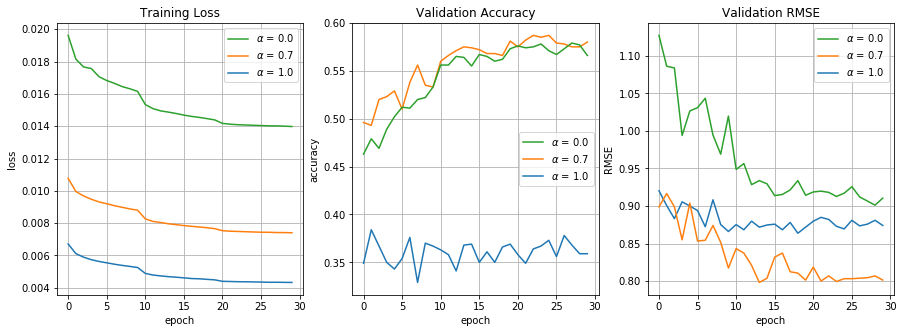

In [3]:
plots_dir='./plots'

plot_dirs=os.listdir(plots_dir)

data_dict=[]
for plot_dir in plot_dirs:
    lmbda=plot_dir.split('Xmulti')[0][-3:]
    var_name=plot_dir.split('tag_')[1][:-4]
    csv_dir=plots_dir+'/'+plot_dir
    plot_data = np.genfromtxt(csv_dir, delimiter=',',skip_header=1, names=['wallTime', 'epoch', 'value'])
    data_dict.append({'lambda':lmbda,'variable':var_name,'data':plot_data})

ax=plt.figure(figsize=(15,5))
legends_trloss=np.array([])
legends_testacc=np.array([])
legends_testrmse=np.array([])
for data in data_dict:
    
    if data['variable']=='train_loss':
        ax= plt.subplot(131)
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.title('Training Loss')
        plt.grid()
        plt.plot(data['data']['epoch'],data['data']['value'],label=r'$\alpha$ = '+data['lambda'])
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1], labels[::-1])
        
    elif data['variable']=='val_accuracy':
        ax=plt.subplot(132)
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.title('Validation Accuracy')
        plt.grid()
        plt.plot(data['data']['epoch'],data['data']['value'],label=r'$\alpha$ = '+data['lambda'])
        andles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1], labels[::-1])
        
    elif data['variable']=='valRMSE':
        ax=plt.subplot(133)
        plt.xlabel('epoch')
        plt.ylabel('RMSE')
        plt.title('Validation RMSE')
        plt.grid()
        plt.plot(data['data']['epoch'],data['data']['value'],label=r'$\alpha$ = '+data['lambda'])
        andles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1], labels[::-1])
        

plt.savefig('ARC_moderate_challange.eps', format='eps', dpi=1000)